<center> <h1 style="background-color:orange; color:white"><br>Análisis RFM<br></h1></center>

<br>
El análisis RFM es un método utilizado para evaluar el valor de los clientes. Es comúnmente empleado en marketing de bases de datos y marketing directo, y ha cobrado especial importancia en los sectores de retail y servicios profesionales.  
<br /><br />

RFM hace referencia a tres dimensiones clave:<br /><br />

<b>- R</b>ecencia – ¿Cuánto tiempo pasó desde la última compra del cliente?<br />
<b>- F</b>recuencia – ¿Con qué frecuencia realiza compras el cliente?<br />
<b>- M</b>onetario – ¿Cuánto gasta el cliente en total?<br />
<br />

Las compras de los clientes pueden representarse en una tabla con columnas que incluyan el nombre del cliente, la fecha de compra y el valor de la compra. Un enfoque común para el análisis RFM es asignar una puntuación a cada dimensión en una escala del 1 al 10, donde el valor máximo representa el comportamiento más deseable. Para calcular estas puntuaciones, se pueden emplear diferentes fórmulas. Por ejemplo, en un negocio basado en servicios, se podrían utilizar las siguientes reglas:  
<br /><br />

<b>- Recencia:</b> Se calcula como el máximo entre "10 – el número de meses desde la última compra" y 1.<br />
<b>- Frecuencia:</b> Se define como el número de compras realizadas en los últimos 12 meses, con un límite de 10, y se toma el máximo entre este valor y 1.<br />
<b>- Valor Monetario:</b> Se calcula tomando el valor más alto de todas las compras realizadas por el cliente, expresado como un múltiplo de un valor de referencia.<br />
<br />

Otra alternativa es definir categorías en lugar de puntajes numéricos. Por ejemplo, la recencia podría dividirse en tres grupos: clientes que compraron en los últimos 90 días, entre 91 y 365 días, y hace más de 365 días. Estas categorías pueden establecerse mediante reglas de negocio o utilizando técnicas de minería de datos para identificar cortes significativos en la información.  
<br /><br />

Una vez que cada dimensión tiene categorías bien definidas, se pueden crear segmentos combinando las distintas variables. Si cada atributo tiene tres categorías, la matriz resultante contendría 27 combinaciones posibles (un enfoque comercial ampliamente utilizado emplea cinco categorías por atributo, lo que genera 125 segmentos). En algunos casos, las empresas pueden decidir fusionar ciertos subsegmentos si las diferencias entre ellos son insignificantes.  

Los segmentos resultantes pueden ordenarse de mayor a menor valor, donde los clientes con mayor recencia, frecuencia y valor monetario son los más valiosos. Identificar estos segmentos permite aprovechar patrones ocultos en los datos, por lo que se recomienda validar los resultados con un conjunto de datos independiente.  

Los defensores del análisis RFM destacan su simplicidad: no requiere software estadístico especializado y sus resultados son fácilmente interpretables por equipos de negocio. En ausencia de otras técnicas de segmentación, este método puede mejorar las tasas de respuesta en campañas promocionales.
<br /><br />




<center> <h1 style="background-color:orange; color:white"><br>Detalles del Conjunto de Datos<br></h1></center>

<br>
Un e-commerce busca segmentar a sus clientes y definir estrategias de marketing basadas en estos segmentos. Para ello, analizaremos el comportamiento de los clientes y crearemos grupos utilizando knn como tecnica de cluster. En otras palabras, agruparemos a los clientes con patrones de comportamiento similares y diseñaremos estrategias de ventas y marketing personalizadas para cada grupo.
<br><br>

<p>
- <b>InvoiceNo:</b> Número de factura. Nominal. Es un número entero de 6 dígitos asignado de manera única a cada transacción. Si el código comienza con la letra 'C', indica una cancelación.<br />
- <b>StockCode:</b> Código de producto (item). Nominal. Es un número entero de 5 dígitos asignado de manera única a cada producto.<br />
- <b>Description:</b> Nombre del producto (item). Nominal.<br />
- <b>Quantity:</b> Cantidad de unidades de cada producto por transacción. Numérico.<br />
- <b>InvoiceDate:</b> Fecha y hora de la factura. Numérico. Indica el día y la hora en que se generó una transacción.<br />
- <b>UnitPrice:</b> Precio unitario. Numérico. Representa el precio de cada producto en libras esterlinas (£).<br />
- <b>CustomerID:</b> Número de cliente. Nominal. Es un número entero de 5 dígitos asignado de manera única a cada cliente.<br />
- <b>Country:</b> País. Nominal. Indica el país de residencia del cliente.<br />
</p>



<a id='1'></a><center> <h1 style="background-color:orange; color:white" ><br>Exploratory Data Analysis<br></h1>

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [64]:
df = pd.read_csv("online_retail_listing.csv",delimiter=';',encoding="latin-1")

In [65]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.00,United Kingdom


In [66]:
df.shape

(1048575, 8)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [68]:
df['Price'] = df['Price'].apply(lambda x: float(str(x.replace(',','.'))))


In [69]:
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [70]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
TotalPrice          0
dtype: int64

In [71]:
df.dropna(inplace = True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [72]:
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
2142
Price yes
1789
TotalPrice yes
2113


<a id='4'></a><center> <h1 style="background-color:orange; color:white" ><br>Recency - R<br></h1>

In [73]:
df = df[~df["Invoice"].str.contains("C", na = False)]
df["Customer ID"] = df["Customer ID"].astype(int)

In [74]:
print("Min Date", df["InvoiceDate"].min(), "Max Date", df["InvoiceDate"].max())
dt.datetime(2011, 12, 11) - df["InvoiceDate"].max()

Min Date 1.02.2010 08:13 Max Date 9.12.2010 20:01


TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'str'

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
recency = (dt.datetime(2011, 12, 11) - df.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency["Recency"] = recency["Recency"].apply(lambda x: x.days)
recency.head()

,Recency
Customer ID,
12346,326
12347,40
12348,76
12349,19
12350,311


<a id='5'></a><center> <h1 style="background-color:orange; color:white" ><br>Frequency - F<br></h1>

In [ ]:
freq = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
freq.head()

,Frequency
Customer ID,
12346,12
12347,7
12348,5
12349,4
12350,1


<a id='6'></a><center> <h1 style="background-color:orange; color:white" ><br>Monetary - M<br></h1>

In [31]:
monetary = df.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary.head()

,Monetary
Customer ID,
12346,77556.46
12347,5408.50
12348,2019.40
12349,4428.69
12350,334.40


<a id='7'></a><center> <h1 style="background-color:orange; color:white" ><br>Create RFM Score<br></h1>

In [32]:
rfm = pd.concat([recency, freq, monetary],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,40,7,5408.50
12348,76,5,2019.40
12349,19,4,4428.69
12350,311,1,334.40


In [ ]:
rfm["RecencyScore"]  = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,326,12,77556.46,2,5,5
12347,40,7,5408.50,4,4,5
12348,76,5,2019.40,3,4,4
12349,19,4,4428.69,5,3,5
12350,311,1,334.40,2,1,2


In [35]:
# RFM Scores: Category
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                    rfm['FrequencyScore'].astype(str) + 
                    rfm['MonetaryScore'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,326,12,77556.46,2,5,5,255
12347,40,7,5408.50,4,4,5,445
12348,76,5,2019.40,3,4,4,344
12349,19,4,4428.69,5,3,5,535
12350,311,1,334.40,2,1,2,212


In [79]:
import re
seg_map = {
    r'555|554|544|545|454|455|445': 'Clientes estrella',
    r'543|444|435|355|354|345|344|335': 'Clientes fieles',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Clientes potencialmente fieles',
    r'512|511|422|421|412|411|311': 'Clientes nuevos',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Clientes prometedores',
    r'535|534|443|434|343|334|325|324|331|321|312|221|213': 'Clientes que necesitan atención',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'Clientes en riesgo',
    r'155|154|144|214|215|115|114|113': 'Clientes dormidos',
    r'132|322|231|241|251|233|232|223|222|132|123|122|212|211': 'Clientes fríos',
    r'111|112|121|131|141|151': 'Clientes perdidos'
}
def asignar_segmento(codigo):
    for regex, segmento in seg_map.items():
        if re.match(regex, codigo):
            return segmento
    return 'No clasificado'

#rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['RFM_SCORE'].apply(asignar_segmento)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,326,12,77556.46,2,5,5,255,Clientes en riesgo
12347,40,7,5408.50,4,4,5,445,Clientes estrella
12348,76,5,2019.40,3,4,4,344,Clientes fieles
12349,19,4,4428.69,5,3,5,535,Clientes que necesitan atención
12350,311,1,334.40,2,1,2,212,Clientes fríos


<a id='8'></a><center> <h1 style="background-color:orange; color:white" ><br>Summary Statistics<br></h1>

In [80]:
rfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
Clientes dormidos,490.80,465.00,98,105.53,4.82,1.00,98,15.25,2544.28,1535.78,98,6117.71
Clientes en riesgo,371.93,374.00,526,112.67,5.30,4.00,526,4.10,2505.22,1463.55,526,5074.25
Clientes estrella,22.03,18.00,1147,18.27,18.12,12.00,1147,24.30,10113.92,4403.82,1147,30942.90
Clientes fieles,86.75,82.00,647,51.72,8.11,6.00,647,5.10,3490.45,2268.35,647,4409.83
Clientes fríos,363.94,370.00,993,136.74,1.82,2.00,993,0.82,474.17,419.87,993,257.97
Clientes nuevos,67.47,52.00,348,51.28,1.15,1.00,348,0.36,250.75,216.79,348,139.74
Clientes perdidos,591.90,582.00,651,131.22,1.12,1.00,651,0.45,205.88,184.91,651,119.83
Clientes potencialmente fieles,65.89,51.00,584,53.72,3.20,3.00,584,1.58,737.37,745.71,584,273.50
Clientes prometedores,36.44,19.00,170,40.24,1.55,2.00,170,0.50,921.89,691.54,170,990.21


<a id='9'></a><center> <h1 style="background-color:orange; color:white" ><br>K-Means<br></h1>

In [81]:
rfm_kmeans = rfm.loc[:,"Recency":"Monetary"]
rfm_kmeans.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,40,7,5408.50
12348,76,5,2019.40
12349,19,4,4428.69
12350,311,1,334.40


In [82]:
##########################################
###     CLUSTRING WITH THE K-MEANS     ###
##########################################
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
dataframe = sc.fit_transform(rfm_kmeans)
kmeans = KMeans(n_clusters = 10)
k_fit = kmeans.fit(dataframe)
k_fit.labels_

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 7, ..., 2, 8, 1])

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0.5, 1.0, 'Elbow method for Optimum number of clusters')

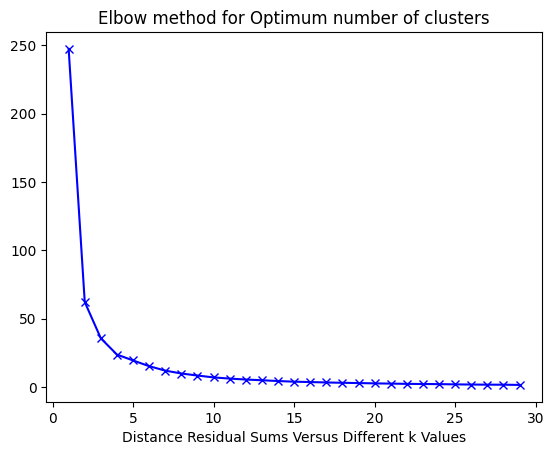

In [83]:
kmeans = KMeans(n_clusters = 10)
k_fit = kmeans.fit(dataframe)
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(dataframe)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums Versus Different k Values")
plt.title("Elbow method for Optimum number of clusters")

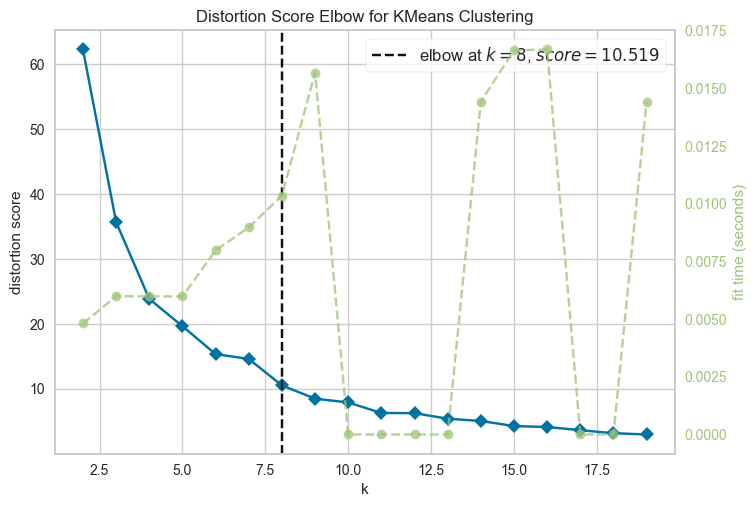

In [48]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(dataframe)
visu.poof();

In [84]:
kmeans = KMeans(n_clusters = 6).fit(dataframe)
cluster = kmeans.labels_
pd.DataFrame({"Customer ID": rfm.index, "Cluster": cluster})
rfm_kmeans["cluster_no"] = cluster
rfm_kmeans["cluster_no"] = rfm_kmeans["cluster_no"] + 1
rfm_kmeans.head()

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,326,12,77556.46,4
12347,40,7,5408.50,2
12348,76,5,2019.40,2
12349,19,4,4428.69,2
12350,311,1,334.40,4


In [85]:
import plotly.express as px
fig = px.scatter_3d(rfm_kmeans, x=rfm_kmeans["Recency"], y=rfm_kmeans["Frequency"], z=rfm_kmeans["Monetary"], color=rfm_kmeans["cluster_no"])
fig.show()